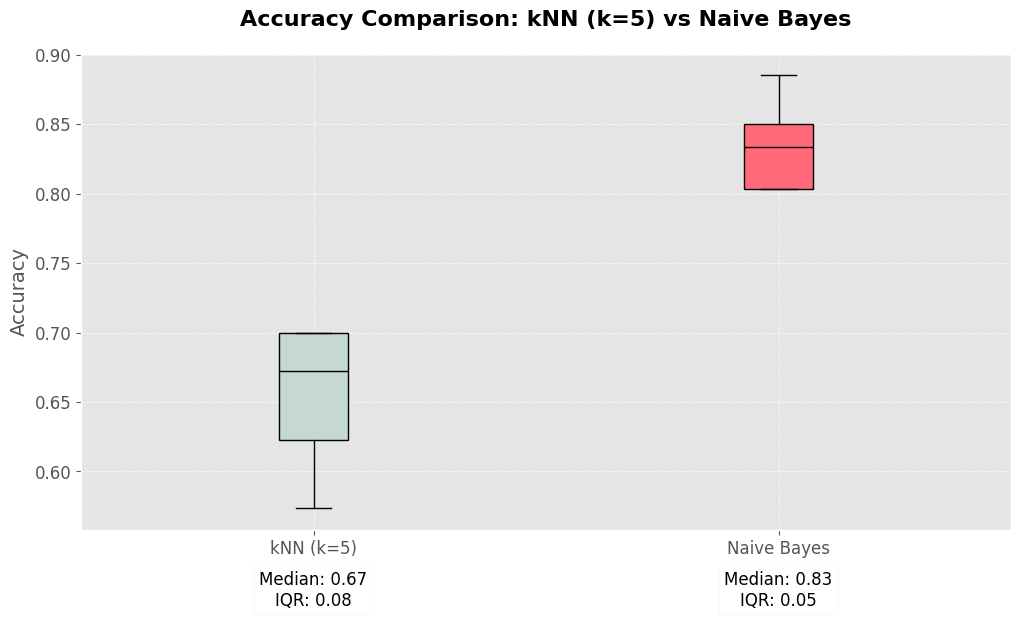

kNN Accuracies: [0.6229508196721312, 0.5737704918032787, 0.6721311475409836, 0.7, 0.7]
Naive Bayes Accuracies: [0.8852459016393442, 0.8032786885245902, 0.8032786885245902, 0.85, 0.8333333333333334]


In [7]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


#Read csv file
df = pd.read_csv("heart-disease.csv")
X = df.drop(columns="target")
y = df["target"]


#Define classifiers
knn = KNeighborsClassifier(n_neighbors=5)
naive_bayes = GaussianNB()


# StratifiedKFold with shuffle
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

knn_accuracies = []
nb_accuracies = []


# Loop over the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #Train KNN model and see the accuracy
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    knn_accuracies.append(accuracy_score(y_test,knn_pred))

    #Train Naive Bayes model and see the accuracy
    naive_bayes.fit(X_train, y_train)
    naive_bayes_pred = naive_bayes.predict(X_test)
    nb_accuracies.append(accuracy_score(y_test,naive_bayes_pred))

# Calculate median and IQR for kNN
knn_median = np.median(knn_accuracies)
knn_iqr = np.percentile(knn_accuracies, 75) - np.percentile(knn_accuracies, 25)

# Calculate median and IQR for Naive Bayes
nb_median = np.median(nb_accuracies)
nb_iqr = np.percentile(nb_accuracies, 75) - np.percentile(nb_accuracies, 25)

# Set up plot style
plt.style.use('ggplot')
plt.figure(figsize=(12, 7))

# Plot boxplots with customized colors
box = plt.boxplot(
    [knn_accuracies, nb_accuracies], 
    tick_labels=['kNN (k=5)', 'Naive Bayes'], 
    patch_artist=True  # Fill the boxes with colors
)

# Customize colors for the boxplots
colors = ['#C5D8D1', '#FF6978']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)


# Add gridlines for easier reading
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Add title and labels with customized font sizes
plt.title('Accuracy Comparison: kNN (k=5) vs Naive Bayes', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customize the appearance of the boxplot elements
plt.setp(box['medians'], color='black', linewidth=1)

# Add annotations below the boxplot for median and IQR
plt.text(1, plt.ylim()[0] - 0.03, f'Median: {knn_median:.2f}\nIQR: {knn_iqr:.2f}', 
         ha='center', va='top', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.text(2, plt.ylim()[0] - 0.03, f'Median: {nb_median:.2f}\nIQR: {nb_iqr:.2f}', 
         ha='center', va='top', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Adjust layout to fit annotations better
plt.subplots_adjust(bottom=0.2)

# Show the plot
plt.show()

# Print the accuracies
print(f"kNN Accuracies: {knn_accuracies}")
print(f"Naive Bayes Accuracies: {nb_accuracies}")

## 1.b)


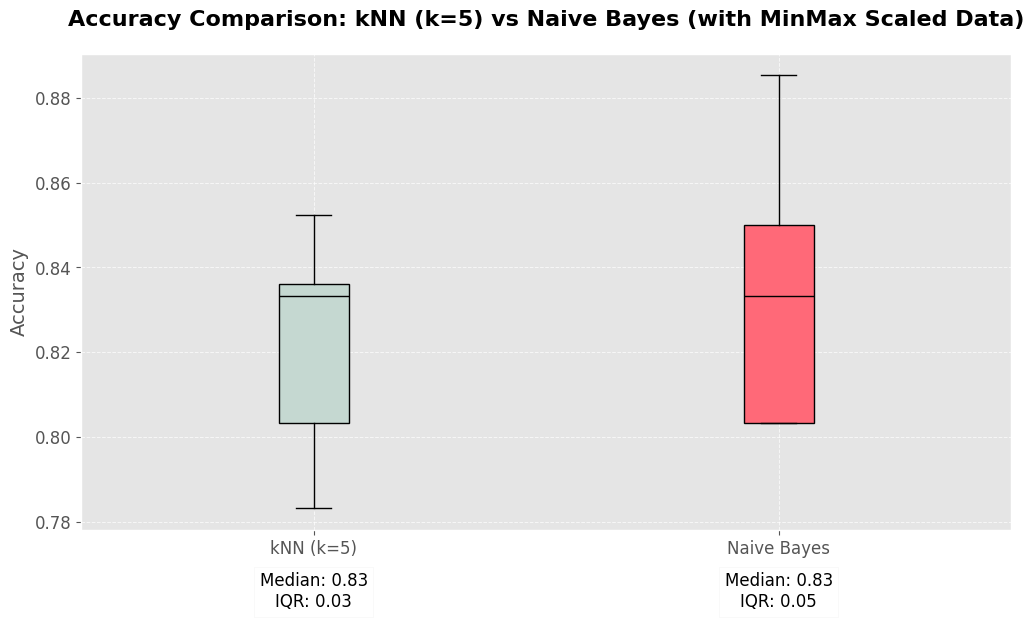

kNN Accuracies: [0.8360655737704918, 0.8032786885245902, 0.8524590163934426, 0.8333333333333334, 0.7833333333333333]
Naive Bayes Accuracies: [0.8852459016393442, 0.8032786885245902, 0.8032786885245902, 0.85, 0.8333333333333334]


In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state=0)


knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()

# Initialize models
knn_model = KNeighborsClassifier(n_neighbors=5)
nb_model = GaussianNB()

# Lists to store accuracies for both models
knn_accuracies = []
nb_accuracies = []

# Train and evaluate models using cross-validation with scaled data
for train_index, test_index in cv.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train and evaluate kNN model
    knn_model.fit(X_train, y_train)
    knn_pred = knn_model.predict(X_test)
    knn_accuracies.append(accuracy_score(y_test, knn_pred))
    
    # Train and evaluate Naive Bayes model
    nb_model.fit(X_train, y_train)
    nb_pred = nb_model.predict(X_test)
    nb_accuracies.append(accuracy_score(y_test, nb_pred))

# Calculate median and IQR for kNN
knn_median = np.median(knn_accuracies)
knn_iqr = np.percentile(knn_accuracies, 75) - np.percentile(knn_accuracies, 25)

# Calculate median and IQR for Naive Bayes
nb_median = np.median(nb_accuracies)
nb_iqr = np.percentile(nb_accuracies, 75) - np.percentile(nb_accuracies, 25)

# Set up plot style
plt.style.use('ggplot')
plt.figure(figsize=(12, 7))

# Plot boxplots with customized colors
box = plt.boxplot(
    [knn_accuracies, nb_accuracies], 
    tick_labels=['kNN (k=5)', 'Naive Bayes'], 
    patch_artist=True # Fill the boxes with color
)

# Customize colors for the boxplots
colors = ['#C5D8D1', '#FF6978']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Add gridlines for easier reading
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Add title and labels with customized font sizes
plt.title('Accuracy Comparison: kNN (k=5) vs Naive Bayes (with MinMax Scaled Data)', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customize the appearance of the boxplot elements
plt.setp(box['medians'], color='black', linewidth=1)

# Add annotations below the boxplot for median and IQR
plt.text(1, plt.ylim()[0] - 0.01, f'Median: {knn_median:.2f}\nIQR: {knn_iqr:.2f}', 
         ha='center', va='top', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.text(2, plt.ylim()[0] - 0.01, f'Median: {nb_median:.2f}\nIQR: {nb_iqr:.2f}', 
         ha='center', va='top', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Adjust layout to fit annotations better
plt.subplots_adjust(bottom=0.2)

# Show the plot
plt.show()

# Print the accuracies
print(f"kNN Accuracies: {knn_accuracies}")
print(f"Naive Bayes Accuracies: {nb_accuracies}")



## 1.c)

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


#Read csv file
df = pd.read_csv("heart-disease.csv")
X = df.drop(columns="target")
y = df["target"]


#Define classifiers
knn = KNeighborsClassifier(n_neighbors=5)
naive_bayes = GaussianNB()


# StratifiedKFold with shuffle
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

knn_accuracies = []
nb_accuracies = []


# Loop over the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #Train KNN model and see the accuracy
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    knn_accuracies.append(accuracy_score(y_test,knn_pred))

    #Train Naive Bayes model and see the accuracy
    naive_bayes.fit(X_train, y_train)
    naive_bayes_pred = naive_bayes.predict(X_test)
    nb_accuracies.append(accuracy_score(y_test,naive_bayes_pred))


In [5]:
from scipy import stats

# Perform a paired t-test
t_stat, p_value = stats.ttest_rel(knn_accuracies, nb_accuracies, alternative="greater")

# Print the results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Check if the hypothesis can be rejected
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis: kNN is statistically superior to Naive Bayes.")
else:
    print("Fail to reject the null hypothesis: No significant difference between kNN and Naive Bayes.")

T-statistic: -6.6903
P-value: 0.9987
Fail to reject the null hypothesis: No significant difference between kNN and Naive Bayes.


## 2.a)



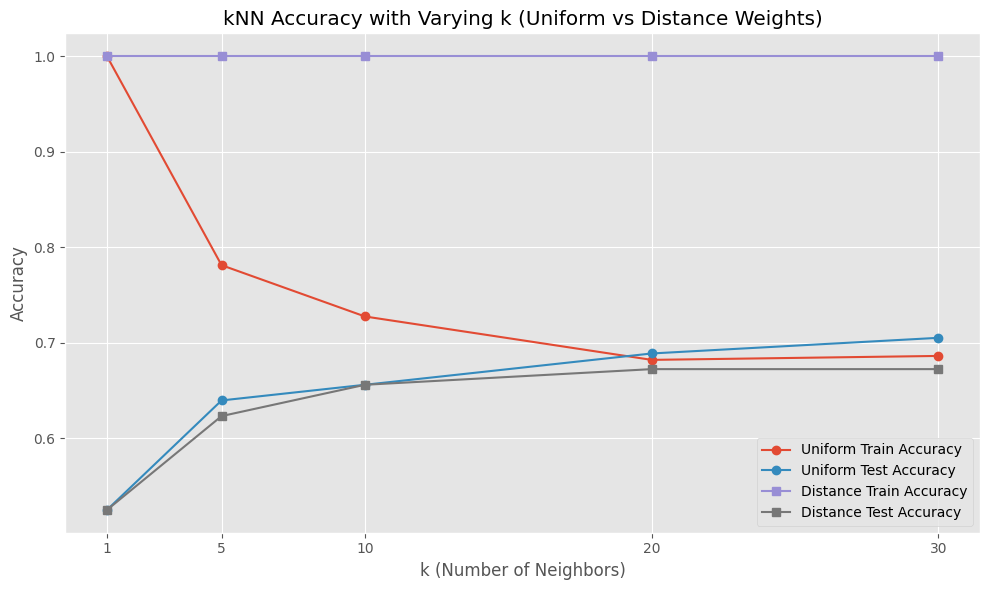

In [6]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the CSV file
df = pd.read_csv("heart-disease.csv")
X = df.drop(columns="target")
y = df["target"]

# Perform an 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Lists to store accuracies
k_values = [1, 5, 10, 20, 30]
train_accuracies_uniform = []
test_accuracies_uniform = []
train_accuracies_distance = []
test_accuracies_distance = []

for k in k_values:
    # Train kNN with uniform weights
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights="uniform")
    knn_uniform.fit(X_train, y_train)
    
    # Train kNN with distance weights
    knn_distance = KNeighborsClassifier(n_neighbors=k, weights="distance")
    knn_distance.fit(X_train, y_train)
    
    # Make predictions on both train and test sets
    uniform_train_predictions = knn_uniform.predict(X_train)
    uniform_test_predictions = knn_uniform.predict(X_test)
    
    distance_train_predictions = knn_distance.predict(X_train)
    distance_test_predictions = knn_distance.predict(X_test)
    
    # Evaluate the train and test accuracy for both models
    train_accuracies_uniform.append(accuracy_score(y_train, uniform_train_predictions))
    test_accuracies_uniform.append(accuracy_score(y_test, uniform_test_predictions))
    
    train_accuracies_distance.append(accuracy_score(y_train, distance_train_predictions))
    test_accuracies_distance.append(accuracy_score(y_test, distance_test_predictions))

# Plotting the accuracies
plt.figure(figsize=(10,6))

# Plot for uniform weights
plt.plot(k_values, train_accuracies_uniform, marker='o', label="Uniform Train Accuracy")
plt.plot(k_values, test_accuracies_uniform, marker='o', label="Uniform Test Accuracy")

# Plot for distance weights
plt.plot(k_values, train_accuracies_distance, marker='s', label="Distance Train Accuracy")
plt.plot(k_values, test_accuracies_distance, marker='s', label="Distance Test Accuracy")

# Add titles and labels
plt.title("kNN Accuracy with Varying k (Uniform vs Distance Weights)")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.xticks(k_values)  # Ensure that x-axis only shows the chosen k values
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## 3.



## 1.	Feature Combinations
The “heart-disease.csv” dataset has 13 non-binary features, leading to numerous combinations that complicate accurate predictions. This complexity can hinder the Naive Bayes classifier’s ability to generalize from training data to unseen cases.
 ## 2.	Assumption of Feature Independence
Naive Bayes assumes all features are independent given the class label. However, features like cholesterol levels, age, blood pressure, and heart rate are often correlated, meaning one feature can influence another. This independence assumption can result in missed relationships and inaccurate predictions.
